In [1]:
# Wine Dataset  in this dataset target_variable is 'quality' feature , quality= wine_quality,  and other features are
#   wine_components feature on which 'quality' feature is  dependent




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape     

(1599, 12)

In [6]:
# CHECKING THE NULL VALUE IN DATSET

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#  SUMMARY OF DATASET

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Statistical Description

wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
# we will use classification technique to fit the model in this dataset,
#   so will do some fundamental chenging

wine['quality']= [ 1 if x>=7 else 0 for x in wine['quality']]

In [10]:
#pd.set_option('display.max_columns', 100)

In [11]:
# group by 'quality' feature and check statistical analysis of all features 

#wine_st= wine.groupby('quality').agg(['mean','max','min','median',])
#wine_st

  VISUALIZATION THE DATASET

0    1382
1     217
Name: quality, dtype: int64


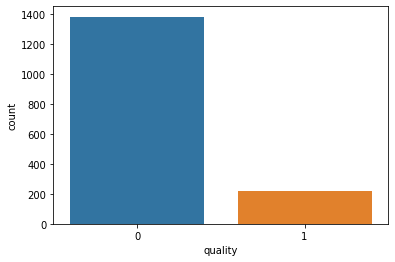

In [12]:

sns.countplot(wine['quality'])  # dataset is imbalanced
print(wine['quality'].value_counts())

<AxesSubplot:>

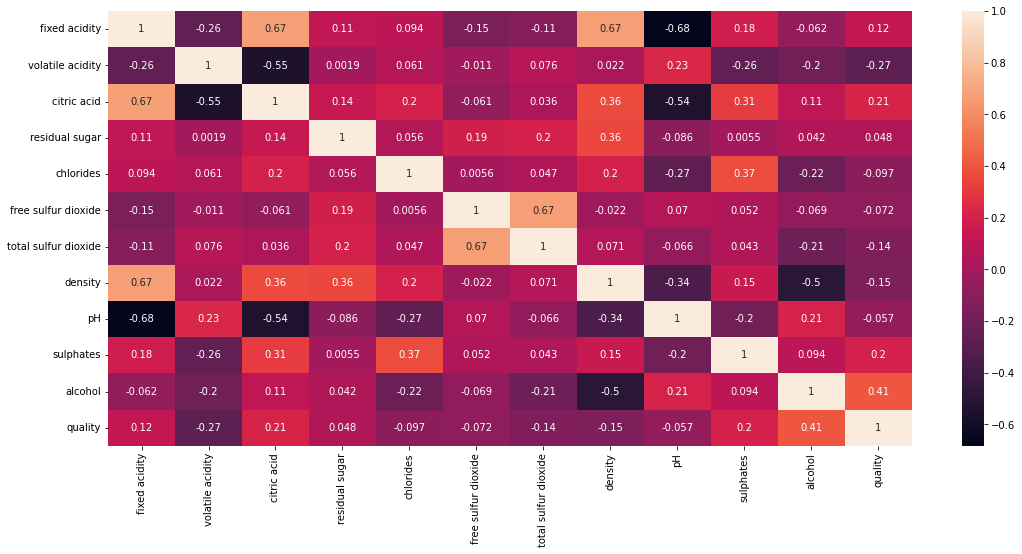

In [13]:
# plotting heatmap to check multicollinearity amongs features,
#   and also check how features are correlate to target variable

plt.figure(figsize=(18,8))
sns.heatmap(wine.corr(), annot=True)

     NO more CORRELATION SEEN IN DATASET AMONG FEATURE

In [110]:
# feature selection method select KBest and also check top features by this method 

from  sklearn.feature_selection import SelectKBest,f_classif

best_feature=SelectKBest(score_func=f_classif,k=5)
fit=best_feature.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
col=pd.DataFrame(x.columns)
feature=pd.concat([col,df_scores],axis=1)
feature.columns=['features_name','score']
df1=feature.nlargest(5,'score')


In [111]:
df1  
       #  'alcohol' features that give more information of wine quality
 #        and this feature is also high positive correlation compare to another  feature

,features_name,score
10,alcohol,327.330689
9,sulphates,140.538251
1,volatile acidity,116.319836
2,citric acid,76.814443
6,total sulfur dioxide,44.590096


In [ ]:
#  but we do not remove any feature because the feature not more

<Figure size 4320x4320 with 0 Axes>

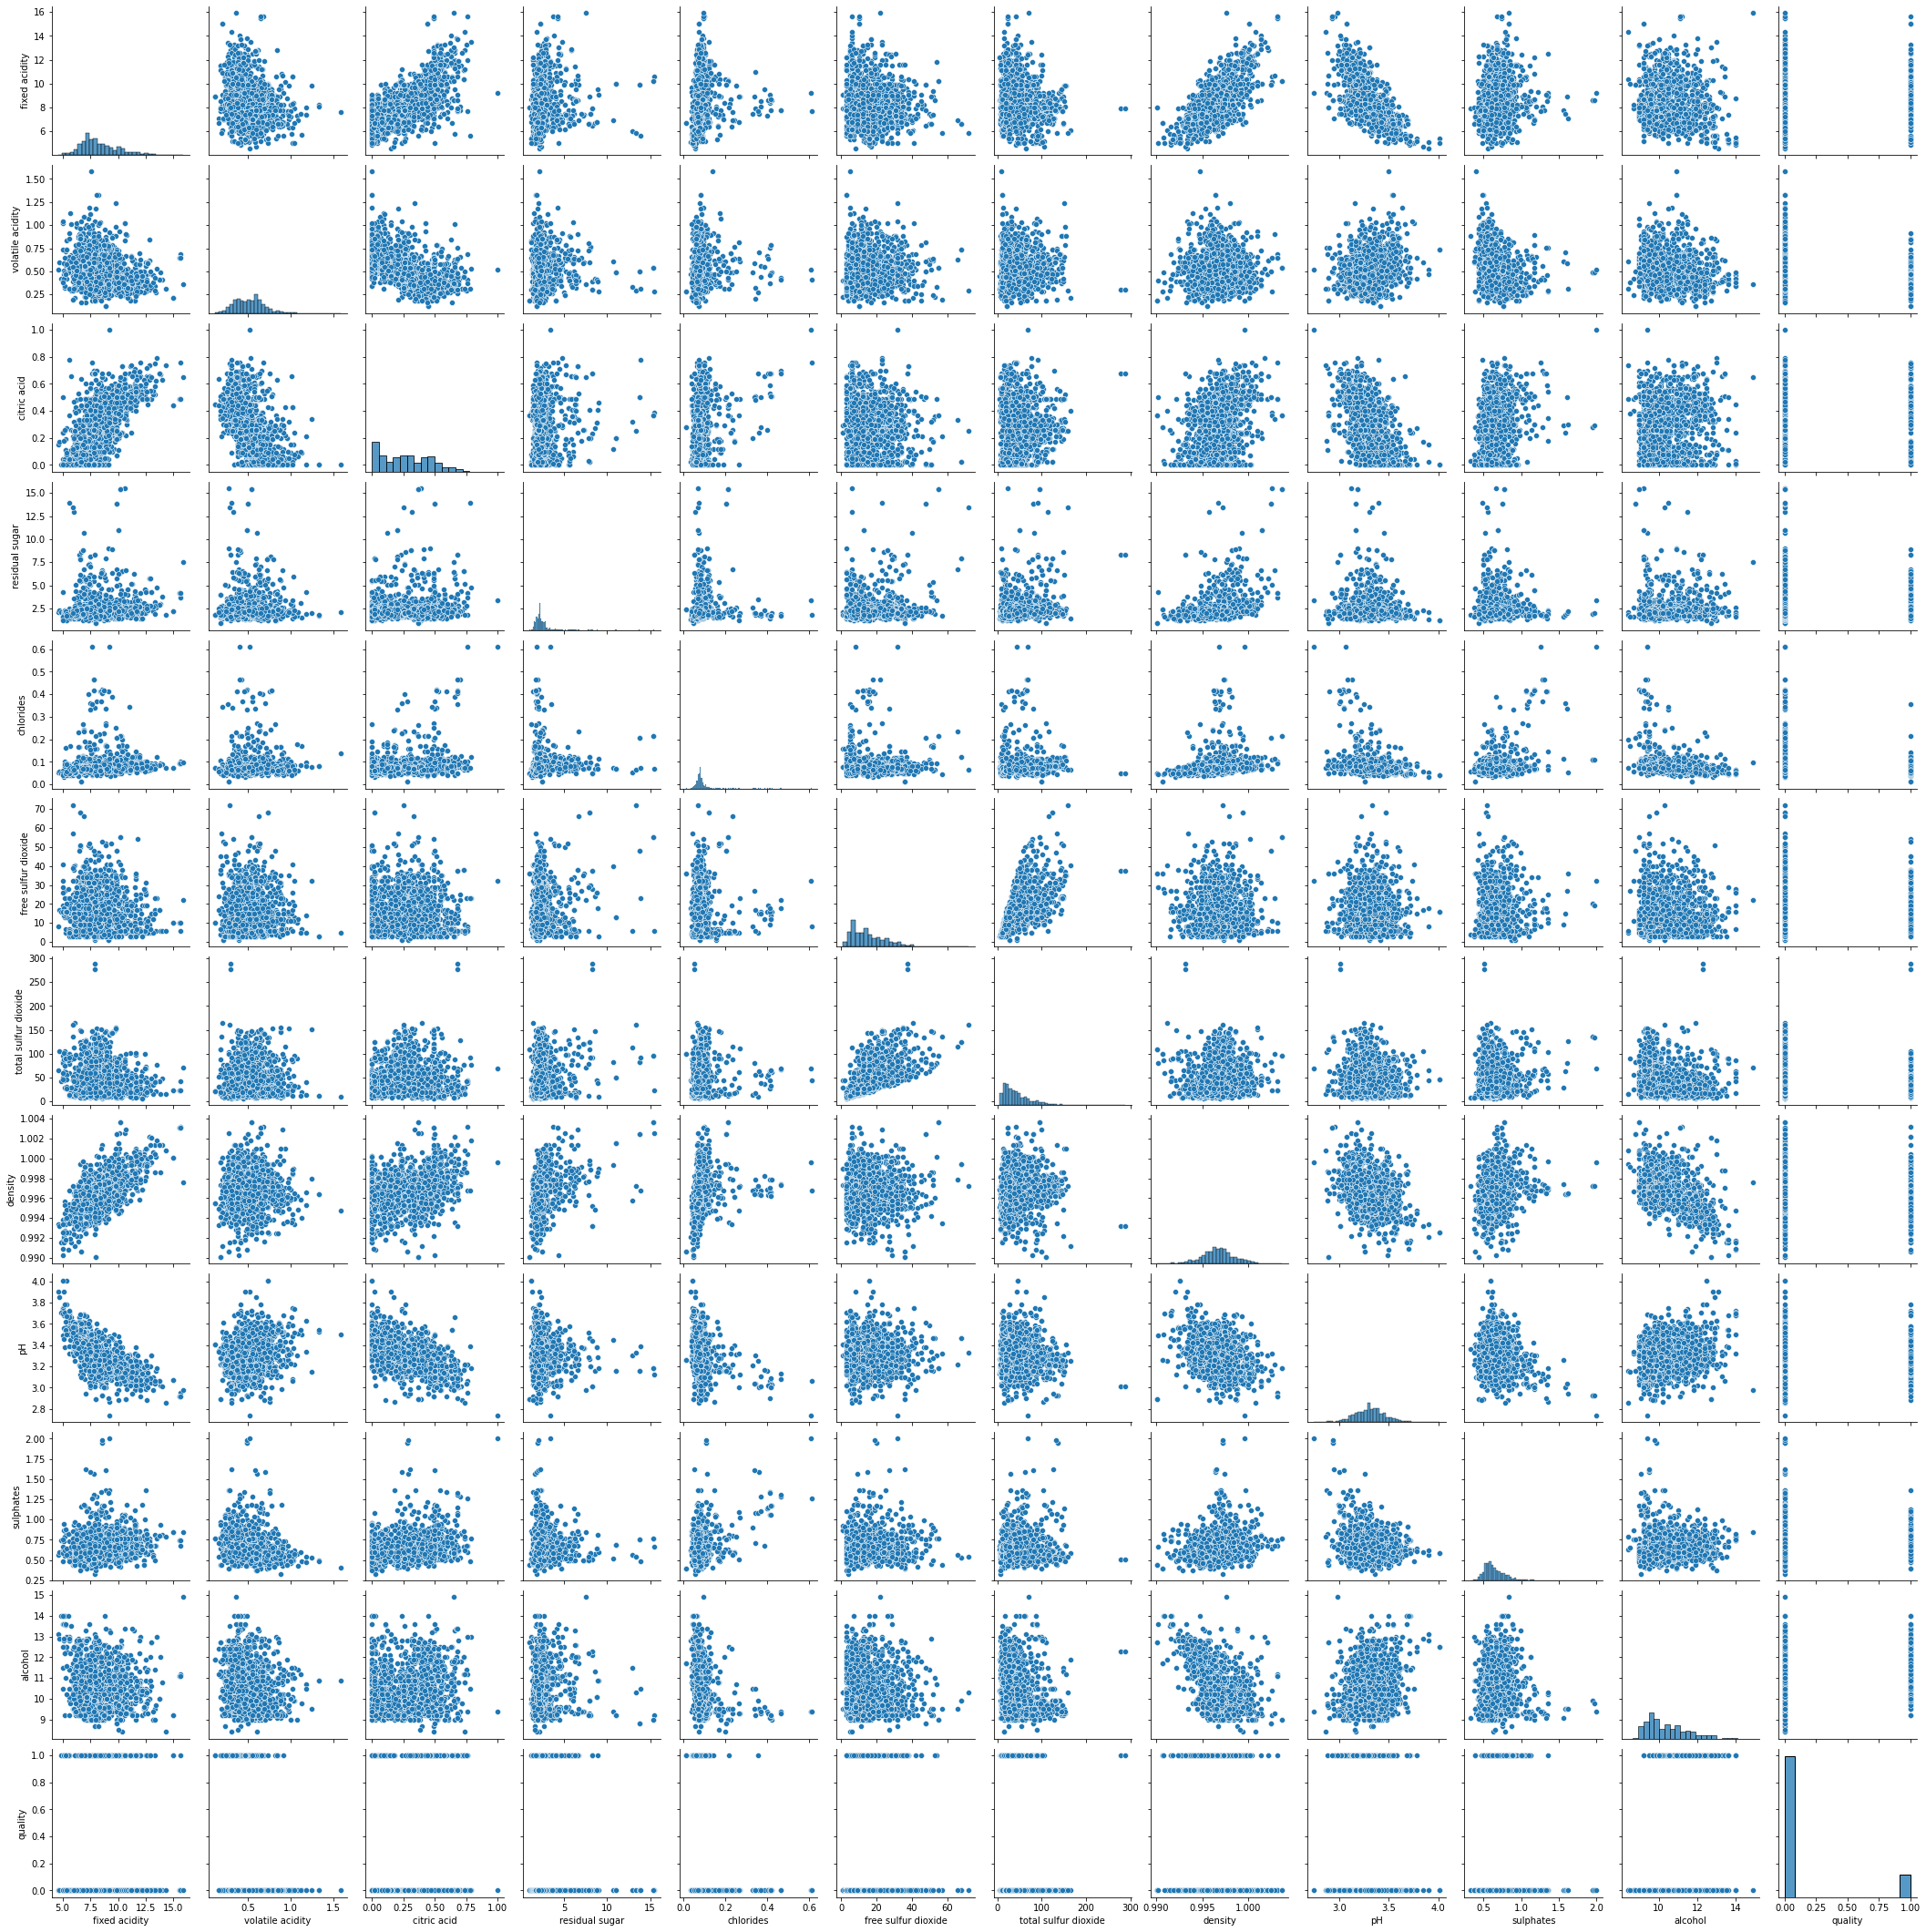

In [14]:
# we plot pairplot to see how to distribute all features  and relate each other

plt.figure(figsize=(60,60))
sns.pairplot(wine)

 show in above plot all FEATURES relation to each other feature are equally distributed

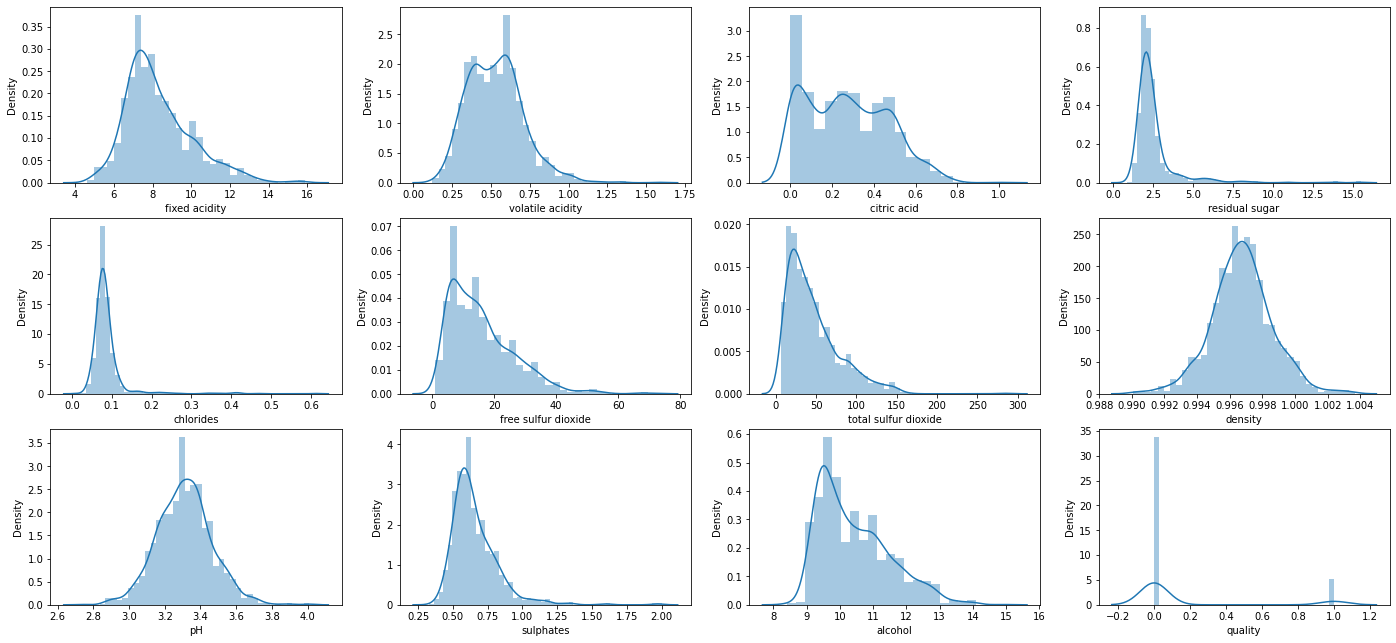

In [15]:
# plotting distplot to see how to features are distriibuted

plt.figure(figsize=(24,11))
p= 1

for col in wine:
    if p<=12:                                      
        ax=plt.subplot(3,4,p)              
        sns.distplot(wine[col])                    
    p+=1
plt.show()

  show in above plot some features are highly skewed

In [16]:
X= wine.drop('quality', axis=1)

In [17]:
skew= X.skew()
skew

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [18]:
#
#  removing skewness

for index in X.skew().index:
    if X.skew().loc[index]> 0.50:
        X[index]= np.log1p(X[index])
    if X.skew().loc[index]< -0.50:
        X[index]= np.square(X[index])


In [19]:
# checking again  skewness 
X.skew()                   # 

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
dtype: float64

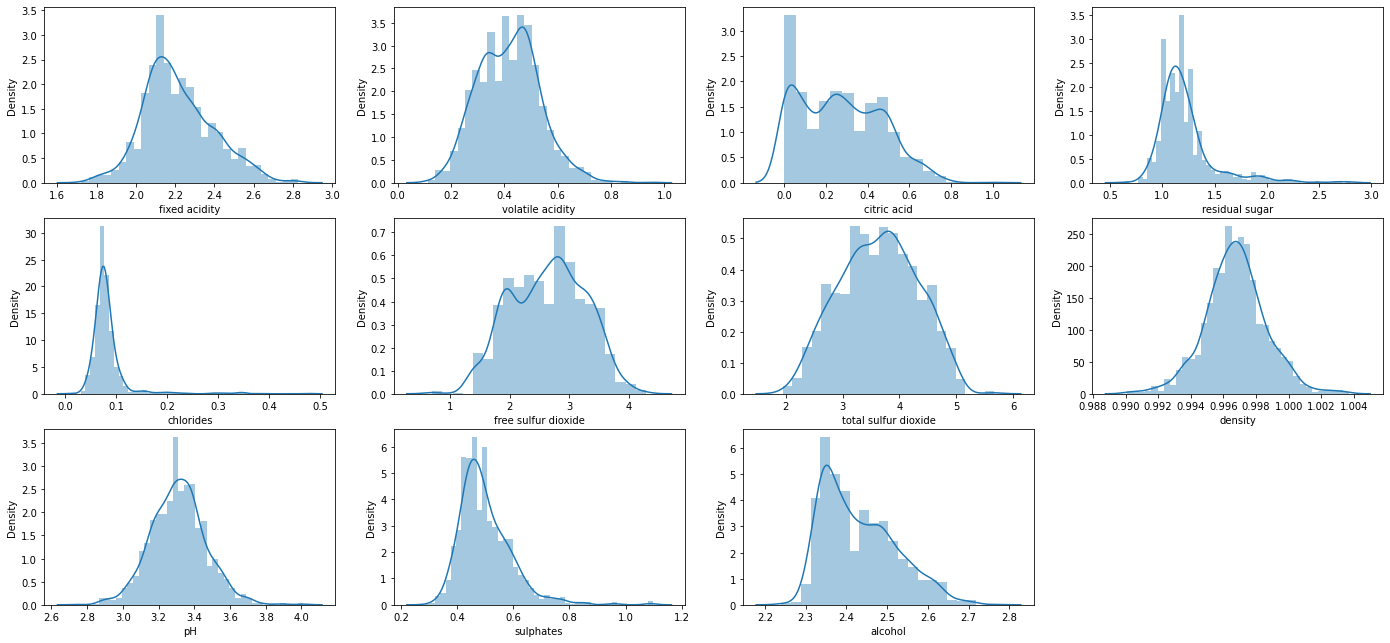

In [20]:
# plotting distplot after removed skewness of  feature 

plt.figure(figsize=(24,11))
p= 1

for col in X:
    if p<=11:                                      
        ax=plt.subplot(3,4,p)                          
        sns.distplot(X[col])
    p+=1
plt.show()

In [21]:
#  dataset's skewness has decreased minimum

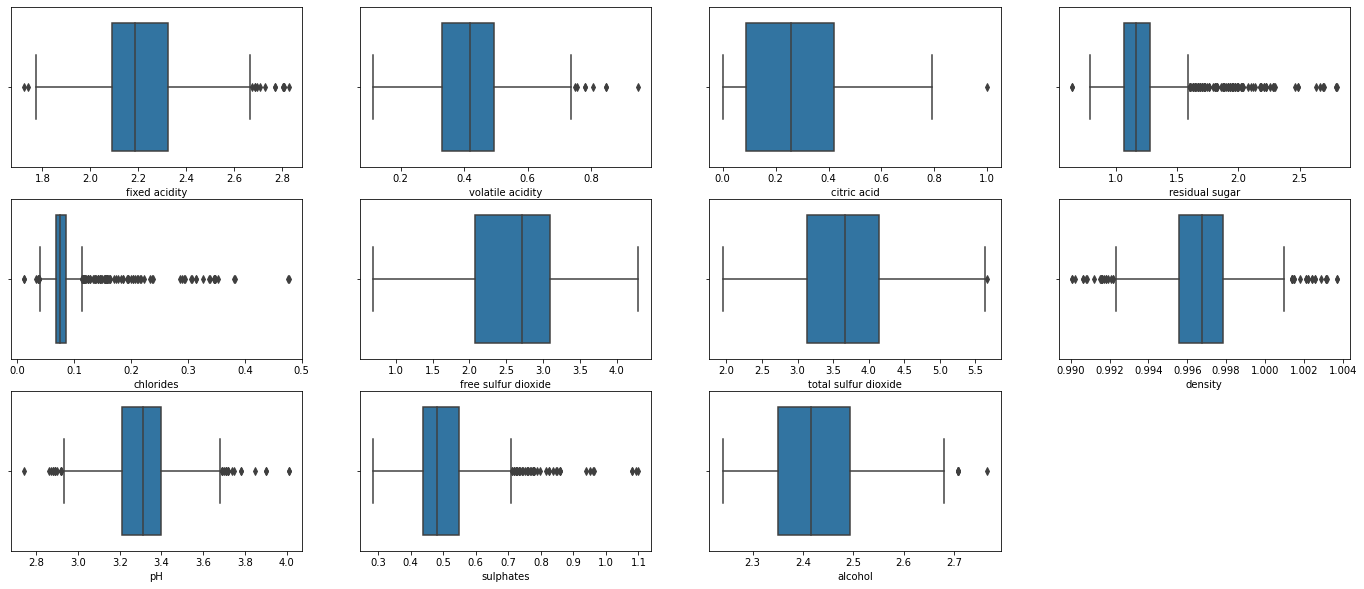

In [22]:
# let's plot BOXPLOT to check outliers

plt.figure(figsize=(24,10))
p= 1

for col in X:
    if p<=11:                                      
        ax=plt.subplot(3,4,p)                          
        sns.boxplot(X[col])
    p+=1
plt.show()

In [23]:
from scipy.stats import zscore

z_scores=zscore(X)
x_new= wine.loc[(abs(z_scores)<3).all(axis=1)]
# after apply check shape

In [24]:
print('original_shape', wine.shape)
print('shape after removing outliers', x_new.shape)

original_shape (1599, 12)
shape after removing outliers (1487, 12)


In [25]:
x_new.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


In [26]:
# Input features

x= x_new.drop('quality', axis=1)

In [27]:
# target

y= x_new['quality']


   THIS IS MULTICLASS CLASSIFICATION PROBLEM

In [28]:
# IMPORT SOME IMPOTANT  LIBRARY

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score as CVS

In [29]:

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [57]:
sc= StandardScaler()

scaler= sc.fit_transform(x)

In [58]:
# over samplin with SMOTE 

x_train,x_test, y_train,y_test= train_test_split(scaler,y, test_size=0.20, random_state= 459)

from imblearn.over_sampling import SMOTE

smp= SMOTE(0.60)
xtrain, ytrain= smp.fit_resample(x_train,y_train)

print(y_train.value_counts(),)
print('\n after over_sampling \n', ytrain.value_counts())

0    1026
1     163
Name: quality, dtype: int64

 after over_sampling 
 0    1026
1     615
Name: quality, dtype: int64


In [59]:
from sklearn.model_selection import KFold
kfold= KFold(n_splits=5, shuffle=True, random_state=459)


    
def model_score(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(ytrain,pred))
        
    print('test_accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred))
    

def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [33]:
# this MODEL FIT WITH  LOGISTIC_REGRESSION

from sklearn.linear_model import LogisticRegression

In [60]:
lr= LogisticRegression()

model_score(lr, xtrain,ytrain, x_test,y_test)

training_score = 0.829981718464351
test_accuracy_score= 0.8825503355704698
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       259
           1       0.54      0.74      0.62        39

    accuracy                           0.88       298
   macro avg       0.75      0.82      0.78       298
weighted avg       0.90      0.88      0.89       298



In [35]:
# CHECKING CROSS_VAL_SCORE WITH  LOGISTIC REGRESSION

cross_val(lr,xtrain,ytrain, 'LogisticRegression')

cross_val_score with LogisticRegression = 0.8275594929201571


In [36]:
#  MODEL FIT WITH  DECISION_TREE

from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc= DecisionTreeClassifier()

model_score(dtc, xtrain,ytrain, x_test,y_test)

training_score = 1.0
test_accuracy_score= 0.87248322147651
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       259
           1       0.51      0.72      0.60        39

    accuracy                           0.87       298
   macro avg       0.73      0.81      0.76       298
weighted avg       0.90      0.87      0.88       298



In [38]:
#  this MODEL FIT WITH  KNN

from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn= KNeighborsClassifier()

model_score(knn, xtrain,ytrain, x_test,y_test)

training_score = 0.9140767824497258
test_accuracy_score= 0.8657718120805369
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       259
           1       0.49      0.82      0.62        39

    accuracy                           0.87       298
   macro avg       0.73      0.85      0.77       298
weighted avg       0.91      0.87      0.88       298



In [40]:
#  this MODEL FIT WITH  SVM

from sklearn.svm import SVC

In [62]:
svm = SVC()

model_score(svm, xtrain,ytrain, x_test,y_test)

training_score = 0.8994515539305301
test_accuracy_score= 0.889261744966443
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       259
           1       0.55      0.79      0.65        39

    accuracy                           0.89       298
   macro avg       0.76      0.85      0.79       298
weighted avg       0.91      0.89      0.90       298



 APPLY CROSS_VALIDATION_SCORE  METHOD 

In [42]:
# CROSS_VAL_SCORE WITH  RANDOMFORESTCLASSIFIEER

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=280)

cross_val(rf,xtrain,ytrain, 'RandomForestclassifier')

cross_val_score with RandomForestclassifier = 0.9287067239973311


In [43]:
# CROSS_VAL_SCORE WITH  ADABOOSTCLASSIFIEER

from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=200, learning_rate= 1.0)

cross_val(adb,xtrain,ytrain, 'AdaBoostclassifier')

cross_val_score with AdaBoostclassifier = 0.8768978426866335


 APPLY  HYPERTUNING METHOD 
    WITH  RANDOMIZED SEARCHCV

In [63]:

from sklearn.model_selection import RandomizedSearchCV

# x_train,x_test,y_train,y_test= train_test_split(scaler,y, test_size= 0.25, random_state=457)

def randomizedcv(model,param,xtrain,ytrain,x_test,y_test,data):
    grid= RandomizedSearchCV(model, param_distributions= param, cv=5, n_jobs=-1)
    grid.fit(xtrain,ytrain)
    
    cls= grid.best_estimator_
    cls.fit(xtrain,ytrain)
    pred= cls.predict(x_test)
    
    print(data, 'with gridsearchcv')
    print('accuracy_score =', accuracy_score(y_test, pred))
    print('classification_report ', classification_report(y_test,pred))
    print('confusion_matrix \n', confusion_matrix(y_test,pred))

In [64]:
# HYPERTUNING WITH GRADIENTBOOSTING

from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier()

param= {'n_estimators':[100,200,450],'learning_rate':[1.0,0.1,0.01],'min_samples_split':[2,3,4],'max_depth':[2,3,4,6]}

randomizedcv(gbc,param,xtrain,ytrain,x_test,y_test,'Gradientboostingclassifier')


Gradientboostingclassifier with gridsearchcv
accuracy_score = 0.9161073825503355
classification_report                precision    recall  f1-score   support

           0       0.95      0.95      0.95       259
           1       0.68      0.69      0.68        39

    accuracy                           0.92       298
   macro avg       0.81      0.82      0.82       298
weighted avg       0.92      0.92      0.92       298

confusion_matrix 
 [[246  13]
 [ 12  27]]


In [91]:
# # HYPERTUNING WITH DECISIONTREE

from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()

param= {'criterion':['gini','entropy'],'min_samples_split':[2,3,4],'max_depth':[2,3,4,6],'min_samples_leaf':[1,2,3,4]}

rand= RandomizedSearchCV(dt,param,cv=5)
rand.fit(xtrain,ytrain)

cls= rand.best_estimator_
cls.fit(xtrain, ytrain)

pred3= cls.predict(x_test)

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,pred3)

0.8484803484803485

In [78]:
# LET'S USE PLOT_ROC_CURVE

from sklearn.metrics import plot_roc_curve

In [101]:

dt= DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred3= dt.predict(x_test)

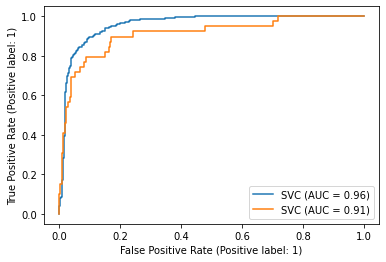

In [99]:
# we plot_roc_curve at training and testing score data
# let's plot roc curve check how much better performe

svm= SVC()
svm.fit(xtrain, ytrain)


dis= plot_roc_curve(svm,xtrain,ytrain, )
plot_roc_curve(svm,x_test,y_test,ax=dis.ax_)

plt.show()

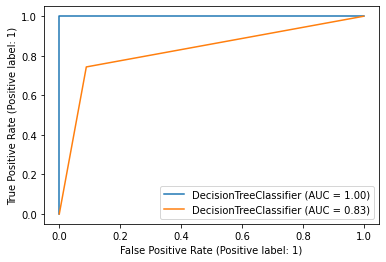

In [107]:
# decision tree  training_score and test_score plot by roc_curve

dt= DecisionTreeClassifier()
dt.fit(xtrain,ytrain)


dis=plot_roc_curve(dt,xtrain,ytrain)
plot_roc_curve(dt,x_test, y_test, ax=dis.ax_)

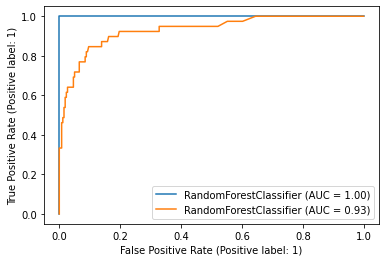

In [105]:
# RANDOMFOREST CLASSIFIER  training_score and test_score plot by ROC_CURVE

rf_c= RandomForestClassifier(n_estimators=300)
rf_c.fit(xtrain, ytrain)


dis=plot_roc_curve(rf_c, xtrain, ytrain)
plot_roc_curve(rf_c, x_test, y_test, ax=dis.ax_)

 CREATING  PIPELINE

In [69]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

In [77]:
pipe= Pipeline([('scaler', StandardScaler()),
               ('randomforest', RandomForestClassifier(n_estimators= 300))])

pipe.fit(xtrain,ytrain)

pred1= pipe.predict(x_test)
print(accuracy_score(y_test,pred1))

print('confusion_matrix \n',confusion_matrix(y_test, pred1))

0.9261744966442953
confusion_matrix 
 [[248  11]
 [ 11  28]]


In [83]:
# SAVE THE  MODEL

import pickle    

In [84]:
# save the PIPELINE model

pipeline = 'final_model.sav'

pickle.dump(pipe, open(pipeline, 'wb'))


In [85]:
# load the model 

pipe_model = pickle.load(open(pipeline, 'rb'))
result = pipe_model.score(x_test, y_test)
result

0.9261744966442953

In [51]:
y_pred= pipe_model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       259
           1       0.81      0.54      0.65        39

    accuracy                           0.92       298
   macro avg       0.87      0.76      0.80       298
weighted avg       0.92      0.92      0.92       298

